# Laboratorium 5 – Przestrzenie ciągłe

## Autorzy
- Kacper Cienkosz
- Miłosz Dubiel

In [22]:
%pip install 'gymnasium[classic_control]'

Note: you may need to restart the kernel to use updated packages.


In [81]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym

from stable_baselines3 import A2C, TD3
from stable_baselines3.common.env_util import make_vec_env

In [58]:
hyperparameters1 = {
    'learning_rate': 0.001,
    'gamma': 0.99,
    'rms_prop_eps': 1e-5,
}

In [25]:
vec_env1 = make_vec_env("MountainCarContinuous-v0", n_envs=10)
model1 = A2C("MlpPolicy", vec_env1, verbose=1, **hyperparameters1)

Using cpu device


In [ ]:
model1.learn(total_timesteps=500000)

In [64]:
env2 = make_vec_env("MountainCarContinuous-v0", n_envs=1)

In [65]:
model2 = A2C("MlpPolicy", env2, verbose=1)

Using cpu device


In [52]:
def evaluate_model(model, env, n_eval_episodes=10):
    rewards = []

    for _ in range(n_eval_episodes):
        obs = env.reset()
        episode_reward = 0

        while True:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, _ = env.step(action)
            episode_reward += reward

            if done:
                break

        rewards.append(episode_reward)

    mean_reward = np.mean(rewards)
    std_reward = np.std(rewards)

    return mean_reward, std_reward

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Zdefiniuj zestawy hiperparametrów
hyperparameters_sets = [
    {'learning_rate': 0.001, 'gamma': 0.99, 'rms_prop_eps': 1e-5},
    {'learning_rate': 0.01, 'gamma': 0.95, 'rms_prop_eps': 1e-6},
    {'learning_rate': 0.001, 'gamma': 0.90, 'rms_prop_eps': 1e-7},
]

results = []

# Dla każdego zestawu hiperparametrów
for i, hyperparameters in enumerate(hyperparameters_sets):
    # Trenuj model
    model = A2C("MlpPolicy", env2, verbose=1, **hyperparameters)
    model.learn(total_timesteps=50000)

    # Oceń model
    mean_reward, std_reward = evaluate_model(model, env2, n_eval_episodes=10)

    # Zapisz wyniki
    results.append((mean_reward, std_reward))

# Rysuj krzywe uczenia
plt.figure(figsize=(10, 6))

for i, (mean_reward, std_reward) in enumerate(results):
    plt.plot(mean_reward, label=f'Set {i+1}')
    plt.fill_between(np.arange(len(mean_reward)), mean_reward - std_reward, mean_reward + std_reward, alpha=0.3)

plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.legend()
plt.show()

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=2, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=2, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=1, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

Text(0, 0.5, 'Reward')

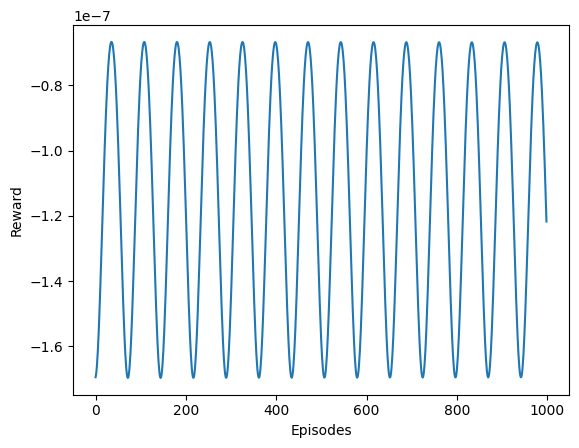

In [54]:
plt.plot(evaluation[0])
plt.fill_between(
    np.arange(len(evaluation[0])),
    evaluation[0] - evaluation[1],
    evaluation[0] + evaluation[1],
    alpha=0.3
)
plt.xlabel("Episodes")
plt.ylabel("Reward")

In [36]:
plot_results(model1, vec_env1)

NameError: name 'plot_results' is not defined

In [47]:
obs = vec_env1.reset()
while True:
    action, _states = model1.predict(obs)
    obs, rewards, dones, info = vec_env1.step(action)
    vec_env1.render("human")

KeyboardInterrupt: 

In [67]:
obs = env2.reset()
while True:
    action, _states = model2.predict(obs)
    obs, rewards, dones, info = env2.step(action)
    env2.render("human")

KeyboardInterrupt: 

In [85]:
env = make_vec_env("MountainCarContinuous-v0", n_envs=1)

model = TD3(
    policy="MlpPolicy",
    verbose=1,
    env=env,
    learning_rate=1e-3,
    buffer_size=50000,
)

model.learn(total_timesteps=50000)

print("Saving model to mountaincar_model.zip")
model.save("mountaincar_model")


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -0.913   |
| time/              |          |
|    episodes        | 4        |
|    fps             | 121      |
|    time_elapsed    | 32       |
|    total_timesteps | 3996     |
| train/             |          |
|    actor_loss      | 0.09     |
|    critic_loss     | 6.26e-05 |
|    learning_rate   | 0.001    |
|    n_updates       | 3895     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -0.466   |
| time/              |          |
|    episodes        | 8        |
|    fps             | 118      |
|    time_elapsed    | 67       |
|    total_timesteps | 7992     |
| train/             |          |
|    actor_loss      | 0.128    |
|    critic_loss     | 5.02e-05 |
|    learning_rate   | 0.001    |
|    n_updates       | 7891    

In [ ]:
env = make_vec_env("MountainCarContinuous-v0", n_envs=1)
model = TD3.load("mountaincar_model.zip", env)
no_render = False

while True:
    obs, done = env.reset(), False
    episode_rew = 0
    while not done:
        if not no_render:
            env.render()
        # Epsilon-greedy
        
        action, _ = model.predict(obs, deterministic=True)
        obs, rew, done, _ = env.step(action)
        episode_rew += rew
    print("Episode reward", episode_rew)

Episode reward [-0.00016274]
Episode reward [-0.00016274]
Episode reward [-0.00016274]
Episode reward [-0.00016274]
Episode reward [-0.00016274]
Episode reward [-0.00016274]
Episode reward [-0.00016274]
